In [1]:
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import requests
import numpy as np
import seaborn as sns


In [30]:
df = pd.DataFrame([])
for name in ['Jan','Feb','Mar','Apr','May']:
    tmp = pd.read_excel('HEDNO_overpwr_'+name+'_2024.xlsx', engine='openpyxl')
    tmp = tmp.loc[(tmp['Nr. of power alarms L1']+ tmp['Nr. of power alarms L2'] + tmp['Nr. of power alarms L3'])>0]
    summary = pd.DataFrame(columns=['Installation', 'Transformer', 'Nr. of power alarms',
       'Avg duration of power alarms (minutes)',
       'Avg % of exceeding threshold'])
    
    grouped = tmp.groupby('Transformer')
    for i, group in grouped:


        group['Nr. of power alarms'] = group['Nr. of power alarms L1']+group['Nr. of power alarms L2']+group['Nr. of power alarms L3']
        group['Avg duration of power alarms (minutes)'] = group[['Avg duration of power alarms L1 (min)','Avg duration of power alarms L2 (min)','Avg duration of power alarms L3 (min)']].mean(axis=1)
        group['Avg % of exceeding threshold'] = group[['Avg % of exceeding threshold L1','Avg % of exceeding threshold L2','Avg % of exceeding threshold L3']].mean(axis=1)
        
        #group['Min duration of power alarms'] = np.min(group['Min duration of power alarms L1 (min)'],group['Min duration of power alarms L2 (min)'],group['Min duration of power alarms L3 (min)'])
        #group['Max duration of power alarms'] = np.max(group['Max duration of power alarms L1 (min)'],group['Max duration of power alarms L2 (min)'],group['Max duration of power alarms L3 (min)'])

        group = group.drop(['Nr. of power alarms L1','Avg duration of power alarms L1 (min)','Avg % of exceeding threshold L1','Nr. of power alarms L2','Avg duration of power alarms L2 (min)','Avg % of exceeding threshold L2','Nr. of power alarms L3','Avg duration of power alarms L3 (min)','Avg % of exceeding threshold L3'],axis=1)
        group = pd.DataFrame(group.iloc[0]).transpose()
        summary = summary.append(group, ignore_index=True)

    summary = summary.sort_values(by='Nr. of power alarms', ascending=False)

    for col in ['Nr. of power alarms','Avg duration of power alarms (minutes)','Avg % of exceeding threshold']:
        summary['norm_'+col]=(summary[col] - summary[col].min()) / (summary[col].max() - summary[col].min())
    weights = [0.5, 1, 0.5]

    summary['Overpower KPI'] = weights[0]*summary['norm_Nr. of power alarms']+weights[1]*summary['norm_Avg % of exceeding threshold']+weights[2]*summary['norm_Avg duration of power alarms (minutes)']
    summary = summary.round({'Overpower KPI':2})
    # summary.to_excel('HEDNO_overpwr_aggregated_'+name+'_2024.xlsx', index=False)
    summary['month'] = name+' 2024'
    summary = summary[['Installation','Transformer','Overpower KPI','month']]

    df = pd.concat([df,summary])
    

C:\Users\EmilyP\AppData\Local\Temp\ipykernel_936\3237109219.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(group, ignore_index=True)
C:\Users\EmilyP\AppData\Local\Temp\ipykernel_936\3237109219.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(group, ignore_index=True)
C:\Users\EmilyP\AppData\Local\Temp\ipykernel_936\3237109219.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(group, ignore_index=True)
C:\Users\EmilyP\AppData\Local\Temp\ipykernel_936\3237109219.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(group, ignore_

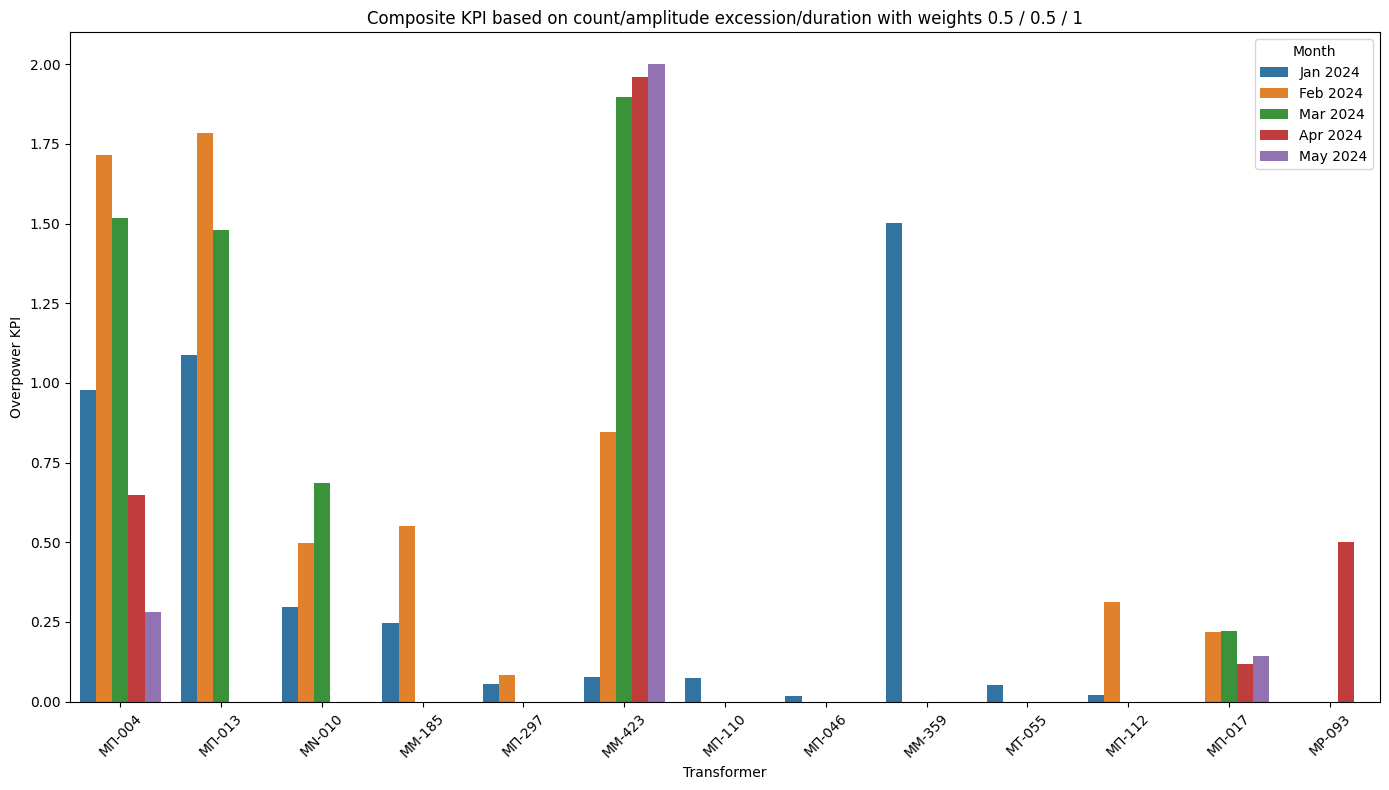

In [31]:
# 2D plot

# Create the grouped bar plot
fig = plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Transformer', y='Overpower KPI', hue='month')

# Set plot labels and title
plt.xlabel('Transformer')
plt.ylabel('Overpower KPI')
plt.title('Composite KPI based on count/amplitude excession/duration with weights '+str(weights[0])+' / '+str(weights[1])+' / '+str(weights[2]))
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.tight_layout()
plt.savefig('groupedPowerKPI_'+str(weights[0])+'_'+str(weights[1])+'_'+str(weights[2])+'.png', dpi=300)
# Show the plot
# plt.show()